In [20]:
import pandas as pd
import ast

In [21]:
def extraer_codebleu(valor):
    if isinstance(valor, str):
        try:
            dic = ast.literal_eval(valor)
            return dic.get('codebleu')
        except (ValueError, SyntaxError):
            return None
    return None 

def readDataset(file_name0):
    dataset0 = pd.read_csv(f"results/{file_name0}", sep="\t", encoding='latin-1')
    dataset0['CodeBleuScore_Real'] = dataset0['CodeBleuScore'].apply(extraer_codebleu)
    return dataset0

In [22]:
baselineDataset = readDataset("results-baseline_00_00_002_deepseek-r1-distill-qwen-7b.csv")
modifiquedPromptDataset = readDataset("results-test_2025-04-19 02_21_25_deepseek-r1-distill-qwen-7b_few-shot.csv")

In [23]:
dataset = pd.merge(baselineDataset, modifiquedPromptDataset, 
         left_on=["Prompt-ID"], 
         right_on=["Prompt-ID"], suffixes=('_baseline', '_test0'))
dataset.dropna()
print()

Text(0, 0.5, 'Diferencia con referencia (rango entre -1 y 1)')

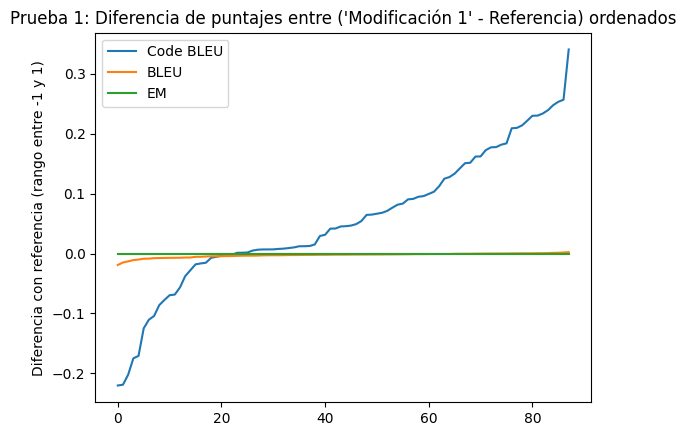

In [24]:
import matplotlib.pyplot as plt

dataset["CodeBleu_Dif"] = dataset["CodeBleuScore_Real_test0"] - dataset["CodeBleuScore_Real_baseline"]
dataset["Bleu_Dif"] = dataset["BleuScore_test0"] - dataset["BleuScore_baseline"]
dataset["EM_Dif"] = dataset["ExactMatchScore_test0"] - dataset["ExactMatchScore_baseline"]
CodeBleu_Dif = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif"].tolist()
Bleu_Dif = dataset.sort_values(by=["Bleu_Dif"])["Bleu_Dif"].tolist()
EM_Dif = dataset.sort_values(by=["EM_Dif"])["EM_Dif"].tolist()

plt.plot(range(len(CodeBleu_Dif)), CodeBleu_Dif, label="Code BLEU")
plt.plot(range(len(Bleu_Dif)), Bleu_Dif, label="BLEU")
plt.plot(range(len(EM_Dif)), EM_Dif, label="EM")

plt.legend()

plt.title("Prueba 1: Diferencia de puntajes entre ('Modificación 1' - Referencia) ordenados")
plt.ylabel("Diferencia con referencia (rango entre -1 y 1)")

In [25]:
test002Dataset = readDataset("results-test_2025-04-17 11_28_39_deepseek-r1-distill-qwen-7b_persona001-programmer.csv")
dataset = pd.merge(dataset, test002Dataset, 
         left_on=["Prompt-ID"], 
         right_on=["Prompt-ID"], suffixes=('', '_context'))
dataset.dropna()


dataset["CodeBleu_Dif_context"] = dataset["CodeBleuScore_Real"] - dataset["CodeBleuScore_Real_baseline"]
dataset["Bleu_Dif_context"] = dataset["BleuScore"] - dataset["BleuScore_baseline"]
dataset["EM_Dif_context"] = dataset["ExactMatchScore"] - dataset["ExactMatchScore_baseline"]

In [26]:
test003Dataset = readDataset("results-test_2025-04-18 20_00_13_deepseek-r1-distill-qwen-7b_context001-programmer.csv")
dataset = pd.merge(dataset, test003Dataset, 
         left_on=["Prompt-ID"], 
         right_on=["Prompt-ID"], suffixes=('', '_system'))
dataset.dropna()
dataset["CodeBleu_Dif_system"] = dataset["CodeBleuScore_Real_system"] - dataset["CodeBleuScore_Real_baseline"]

In [27]:
test004Dataset = readDataset("results-test_2025-04-18 22_52_11_deepseek-r1-distill-qwen-7b_one-shot.csv")
dataset = pd.merge(dataset, test004Dataset, 
         left_on=["Prompt-ID"], 
         right_on=["Prompt-ID"], suffixes=('', '_one_shot'))
dataset.dropna()
dataset["CodeBleu_Dif_one_shot"] = dataset["CodeBleuScore_Real_one_shot"] - dataset["CodeBleuScore_Real_baseline"]

Text(0, 0.5, 'Diferencia con referencia (rango entre -1 y 1)')

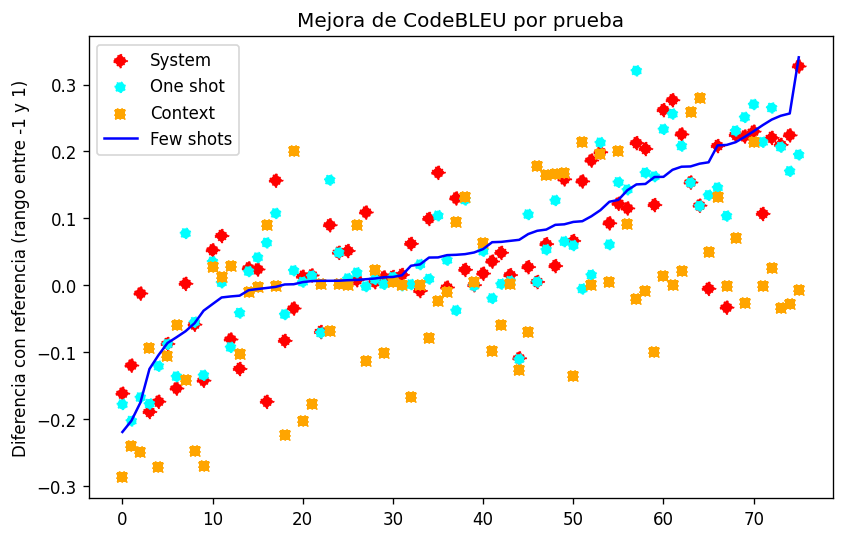

In [30]:
CodeBleu_Dif_few_shots = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif"].tolist()
CodeBleu_Dif_context = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif_context"].tolist()
CodeBleu_Dif_system = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif_system"].tolist()
CodeBleu_Dif_one_shot = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif_one_shot"].tolist()

plt.figure(figsize=(8, 5), dpi=120)
plt.scatter(range(len(CodeBleu_Dif_system)), CodeBleu_Dif_system, label="System", linestyle='dotted', color="red", marker="D")
plt.scatter(range(len(CodeBleu_Dif_one_shot)), CodeBleu_Dif_one_shot, label="One shot", linestyle='dotted', color="cyan", marker="o")
plt.scatter(range(len(CodeBleu_Dif_context)), CodeBleu_Dif_context, label="Context", linestyle='dotted', color="orange", marker="s")
#plt.plot(range(len(CodeBleu_Dif_test2)), CodeBleu_Dif_test2, label="Context", linestyle='dotted', color="orange")
plt.plot(range(len(CodeBleu_Dif_few_shots)), CodeBleu_Dif_few_shots, label="Few shots", color="blue")

plt.legend()

plt.title("Mejora de CodeBLEU por prueba")
plt.ylabel("Diferencia con referencia (rango entre -1 y 1)")

Text(0, 0.5, 'Diferencia con referencia (rango entre -1 y 1)')

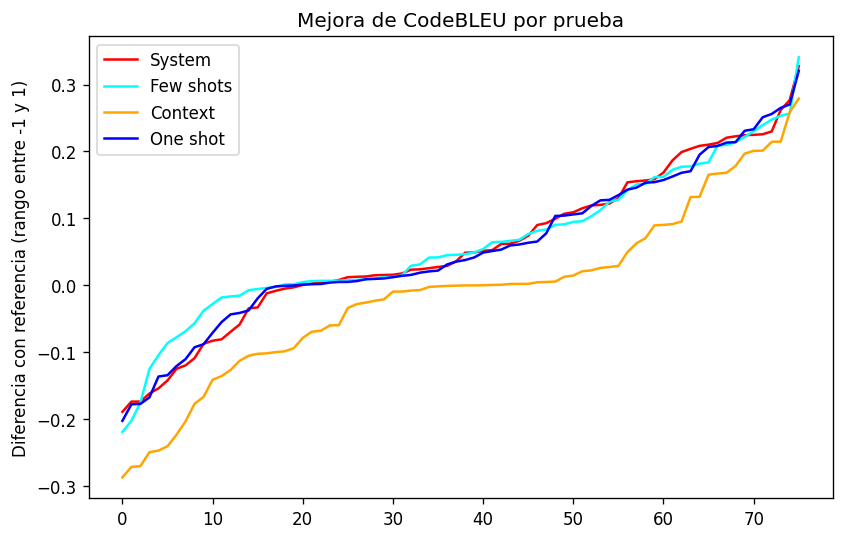

In [32]:
CodeBleu_Dif_few_shots = dataset.sort_values(by=["CodeBleu_Dif"])["CodeBleu_Dif"].tolist()
CodeBleu_Dif_context = dataset.sort_values(by=["CodeBleu_Dif_context"])["CodeBleu_Dif_context"].tolist()
CodeBleu_Dif_system = dataset.sort_values(by=["CodeBleu_Dif_system"])["CodeBleu_Dif_system"].tolist()
CodeBleu_Dif_one_shot = dataset.sort_values(by=["CodeBleu_Dif_one_shot"])["CodeBleu_Dif_one_shot"].tolist()

plt.figure(figsize=(8, 5), dpi=120)
#plt.scatter(range(len(CodeBleu_Dif_system)), CodeBleu_Dif_system, label="System", linestyle='dotted', color="red", marker="D")
#plt.scatter(range(len(CodeBleu_Dif_few_shots)), CodeBleu_Dif_few_shots, label="Few shots", linestyle='dotted', color="cyan", marker="o")
plt.plot(range(len(CodeBleu_Dif_system)), CodeBleu_Dif_system, label="System", color="red")
plt.plot(range(len(CodeBleu_Dif_few_shots)), CodeBleu_Dif_few_shots, label="Few shots", color="cyan")
plt.plot(range(len(CodeBleu_Dif_context)), CodeBleu_Dif_context, label="Context", color="orange")
plt.plot(range(len(CodeBleu_Dif_one_shot)), CodeBleu_Dif_one_shot, label="One shot", color="blue")

plt.legend()

plt.title("Mejora de CodeBLEU por prueba")
plt.ylabel("Diferencia con referencia (rango entre -1 y 1)")